In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
df = pd.read_csv('/content/auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [20]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [21]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce').astype('Int64')
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,Int64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [22]:
df.notnull().sum()

,0
mpg,398
cylinders,398
displacement,398
horsepower,392
weight,398
acceleration,398
model year,398
origin,398
car name,398


In [23]:
df = df.dropna()
df.notnull().sum()

,0
mpg,392
cylinders,392
displacement,392
horsepower,392
weight,392
acceleration,392
model year,392
origin,392
car name,392


In [31]:
count = {}

for i in df.columns:
  if i == 'car name':
    continue
  count[i] = len(df[i].unique())

count

{'mpg': 127,
 'cylinders': 5,
 'displacement': 81,
 'horsepower': 93,
 'weight': 346,
 'acceleration': 95,
 'model year': 13,
 'origin': 3}

In [37]:
X = df.drop(['car name', 'mpg'], axis=1)
y = df['mpg']

In [33]:
X.shape, y.shape

((392, 7), (392,))

In [40]:
transform = StandardScaler()
X = transform.fit_transform(X)
y = transform.fit_transform(y.values.reshape(-1, 1))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313, 1) (79, 1)


In [71]:
def train(X, y, batch_size=32, learning_rate=0.01, epochs=100, alpha=0.0):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    bias = 0

    for epoch in range(epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_batch = y_batch.reshape(-1, 1)

            y_predicted = np.dot(X_batch, weights) + bias
            error = y_predicted - y_batch

            dw = (1 / batch_size) * np.dot(X_batch.T, error) + alpha * weights
            db = (1 / batch_size) * np.sum(error)

            weights -= learning_rate * dw
            bias -= learning_rate * db

    return weights, bias

In [49]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {'mae': mae, 'rmse': rmse, 'r2': r2}

In [81]:
alpha_list = np.logspace(-4, 2, 10)

train_r2_scores = []
test_r2_scores = []
alpha_values = []
weights_list = []
bias_list = []

for alpha in alpha_list:
    weights, bias = train(X_train, y_train, alpha=alpha)

    y_train_pred = np.dot(X_train, weights) + bias
    y_test_pred = np.dot(X_test, weights) + bias

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    alpha_values.append(alpha)
    weights_list.append(weights)
    bias_list.append(bias)

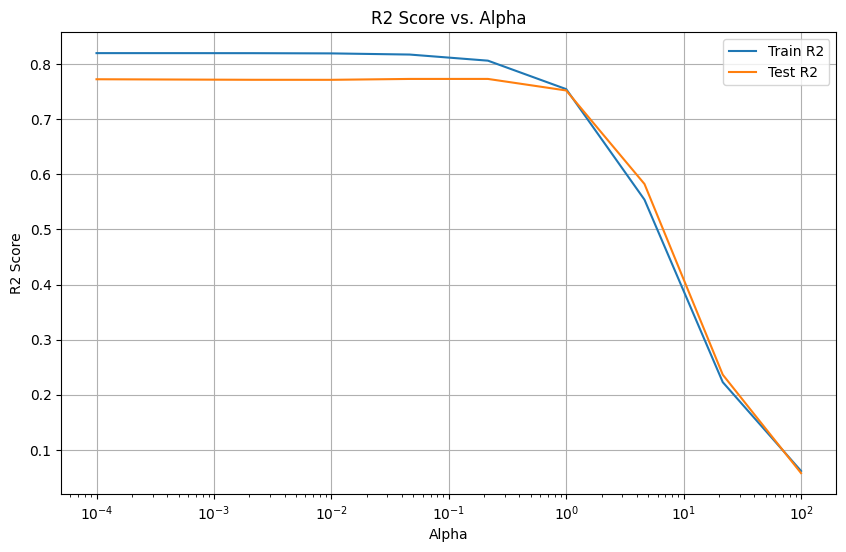

Best Alpha: 0.21544346900318823


In [78]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_r2_scores, label='Train R2')
plt.plot(alpha_values, test_r2_scores, label='Test R2')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

best_alpha_index = np.argmax(test_r2_scores)
best_alpha = alpha_values[best_alpha_index]
print(f"Best Alpha: {best_alpha}")

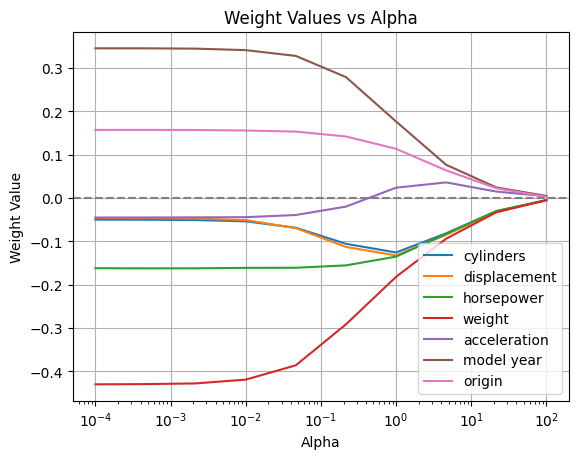

In [97]:
labels = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

for i in range(len(labels)):
    weights_for_feature = [w[i, 0] for w in weights_list]
    plt.plot(alpha_values, weights_for_feature, label=labels[i])

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Alpha')
plt.ylabel('Weight Value')
plt.title('Weight Values vs Alpha')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

- Các trọng số có vai trò nhỏ dần khi 𝛂 tăng lên.
- Mô hình trở nên đơn giản hơn khi 𝛂 tăng lên.
- Khi λ lớn dần lên kết quả dự đoán sẽ giảm dần sử phụ thuộc vào các đặc trưng đầu vào. Như vạy sẽ giảm bớt tình trạng overfitting. Nhưng λ quá lớn sẽ làm cho kết quả dự đoán bị underfitting.